Using Chan-Vese Segmentation on unedited supplied images

Importing relevant libraries

In [7]:
import os
import skimage as ski
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from skimage.color import rgb2gray

Displaying Original Image

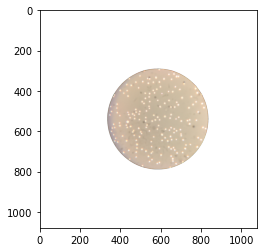

In [8]:
img = mpimg.imread(r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\Circular Crops\SiHa.Day 0_T25\T25 - 20x.JPG')
imgplot = plt.imshow(img)
plt.show()

Chan-Vese Segmentation

<ipython-input-9-15767ea8c491>:9: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray_img = rgb2gray(img)


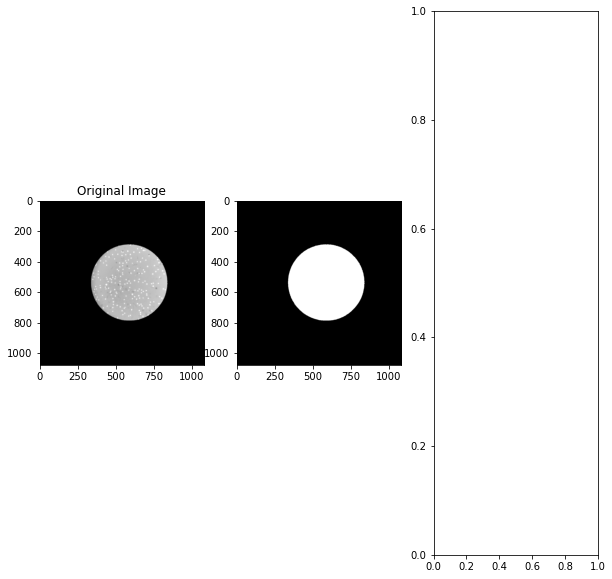

In [9]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage import img_as_float
from skimage.segmentation import chan_vese
fig, axes = plt.subplots(1, 3, figsize=(10, 10))

# Importing and grayscaling image from Devina's Files
gray_img = rgb2gray(img)

# Computing the Chan VESE segmentation technique
chanvese_gray_img = chan_vese(gray_img, max_iter=100, extended_output=True)
ax = axes.flatten()

# Plotting the original image
ax[0].imshow(gray_img, cmap="gray")
ax[0].set_title("Original Image")

# Plotting the segmented - 100 iterations image
ax[1].imshow(chanvese_gray_img[0], cmap="gray")
title = "Chan-Vese segmentation - {} iterations". format(len(chanvese_gray_img[2]))

Thresholding Segmentation

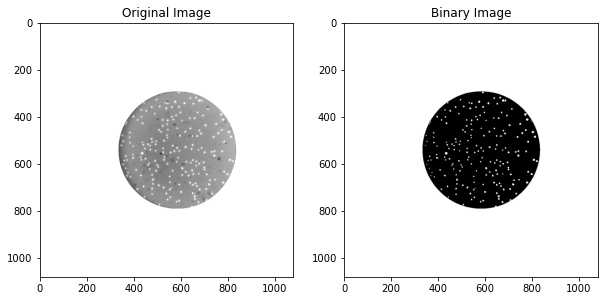

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters

# Load the image
image = io.imread(r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\Circular Crops\SiHa.Day 0_T25\T25 - 20x.JPG', as_gray=True)

# Apply threshold
thresh = filters.threshold_otsu(image)
binary = image > thresh

# Show the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Binary Image')
plt.imshow(binary, cmap='gray')
plt.show()

Region-Based Segmentation

<ipython-input-12-dcb3a41e4ff7>:7: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray_img = rgb2gray(img)


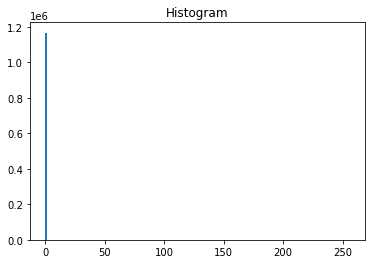

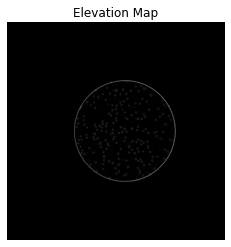

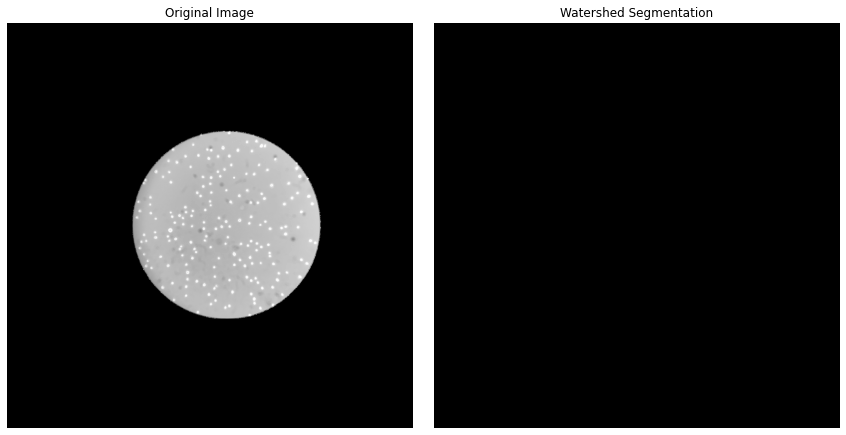

In [12]:
#Importing libraries
import scipy as sp
from skimage.exposure import histogram

# Grayscale image
from skimage.color import rgb2gray
gray_img = rgb2gray(img)


#Showing histogram
hist, hist_centers = ski.exposure.histogram(gray_img)
plt.hist(gray_img.ravel(), bins=256, range=[0, 256])
plt.title('Histogram')
plt.show()



#Elevation Map
elevation_map = ski.filters.sobel(gray_img)
plt.imshow(elevation_map, cmap='gray')
plt.title('Elevation Map')
plt.axis('off')
plt.show()


# Threshold segmentation
markers = np.zeros_like(gray_img)
markers[gray_img < 10000000] = 1
markers[gray_img > 100] = 2
segmentation = ski.segmentation.watershed(elevation_map, markers)
segmentation = sp.ndimage.binary_fill_holes(segmentation - 1)
labeled_cells, _ = sp.ndimage.label(segmentation)

# Display the original and segmented images
plt.figure(figsize=(12, 6))



# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')


# Segmented image
plt.subplot(1, 2, 2)
plt.imshow(labeled_cells, cmap='nipy_spectral')
plt.title('Watershed Segmentation')
plt.axis('off')

plt.tight_layout()
plt.show()

Watershed Segmentation - Alternative Method

<ipython-input-6-0d535951e5cb>:13: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  gray_image = rgb2gray(image)
<ipython-input-6-0d535951e5cb>:56: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  ax[2].imshow(label2rgb(labels), cmap='jet')


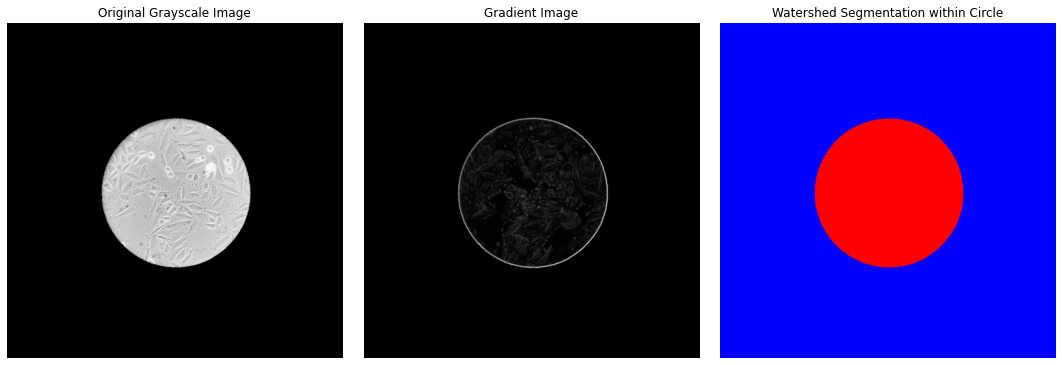

In [6]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, morphology, segmentation, measure
from skimage.color import rgb2gray
from skimage.color import label2rgb
from skimage.measure import label

# Load the image
image = io.imread(r'C:\Users\nthat\OneDrive - University of Cape Town\Fourth Year\CHE4045Z - RESEARCH\Research Tools\Devina_Images\Images\Circular Crops\SiHa.Day 2_T25\T25 - 40x.JPG')

# Convert to grayscale
gray_image = rgb2gray(image)


# Create a circular mask
height, width = gray_image.shape
center = (height // 2, width // 2)  # Center of the circle
radius = 20000  # Adjust radius as needed

# Create a grid of (x, y) coordinates
Y, X = np.ogrid[:height, :width]
mask = (X - center[1])**2 + (Y - center[0])**2 <= radius**2  # Circular mask

# Apply Gaussian filter to reduce noise
smooth_image = filters.gaussian(gray_image, sigma=1)

# Compute the gradient
gradient = filters.sobel(smooth_image)

# Create binary image with the mask
thresh = filters.threshold_otsu(smooth_image)
binary = (smooth_image < thresh) & mask  # Apply mask here

# Remove small objects
cleaned_binary = morphology.remove_small_objects(binary, min_size=500)

# Label the markers
markers = measure.label(cleaned_binary)

# Apply watershed segmentation within the mask
labels = segmentation.watershed(gradient, markers, mask=binary)

# Visualize the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Grayscale Image')
ax[0].axis('off')

ax[1].imshow(gradient, cmap='gray')
ax[1].set_title('Gradient Image')
ax[1].axis('off')

ax[2].imshow(label2rgb(labels), cmap='jet')
ax[2].set_title('Watershed Segmentation within Circle')
ax[2].axis('off')

plt.tight_layout()
plt.show()